In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv
%matplotlib inline

from scipy.spatial import Voronoi
from scipy import interpolate

from tyssue import Sheet
from tyssue import SheetGeometry
from tyssue.geometry.sheet_geometry import ClosedSheetGeometry
from tyssue.generation import hexa_cylinder, sheet_from_cell_centers, extrude
from tyssue.topology import type1_transition
from tyssue.draw import sheet_view

from tyssue.dynamics import model_factory, effectors
from tyssue.solvers.quasistatic import QSSolver
from tyssue import config

import math


### Initial tissue generation

In [2]:
points_xyz = hexa_cylinder(23, 15, 50, noise=0, capped=True)
sheet = sheet_from_cell_centers(points_xyz)
ClosedSheetGeometry.update_all(sheet)


In [3]:
ipv.clear()
fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": sheet.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[  0,   3],
       [713, 529],
       [359, 358],
       ...,
       [487, 490],
       [588, 110],
       [  1, 184]], dtype=uint32), texture=None, x=array([-4.52594826e+00,  4.89472777e+00, -3.75334610e+00, -8.65285363e+00,
       -8.97054230e+00, -4.91996710e+01, -4.73731254e+01,  2.78579778e-02,
       -1.52398458e+00, -2.20130444e+01,  4.73344715e+01,  4.16890172e+01,
        4.57828219e+01,  5.76691319e+00,  1.32890241e+01,  3.80588991e+00,
       -2.37386063e+01, -2.20937678e+01, -4.79747750e+01, -4.49678662e+01,
       -4.95034278e+01, -4.88909452e+01, -2.76193145e+01,  2.41565091e+00,
        3.19015895e+00,  6.71598874e+00,  1.77152523e+01,  1.05376727e+01,
        1.30316232e+01,  3.45514676e+00,  2.31573446e+00, -4.53457294e+00,
        4.42446423e+00,  4.42992580e+00,  8.94210996e+00,  1.76323353e+01,
        9.40831462e+00,  8.95215362e+00, -4.72772567e+01, -3.75455685e+00,
        4.88824242e+00, -8.97820378e+00, -4.94929174e+01, -4.88805039e+01,
       -4.58419425e+01, -1.75843540e+01, -1.55338804e+01, -5.90830150e+00,
       -1.32607074e+01, -1.83001142e+01, -1.51877372e+01, -9.38717389e+00,
       -1.39652205e+01, -3.65631902e+00, -1.17498487e+01,  4.88739801e+01,
        4.88422651e+01,  4.79352105e+01,  4.94862099e+01,  4.94541090e+01,
        4.91592842e+01,  4.79595544e+01,  4.88959453e+01,  4.79696363e+01,
        4.49536553e+01,  4.78610678e+01,  4.48619843e+01,  4.28405724e+01,
        4.27854628e+01,  4.48893731e+01,  4.91840797e+01,  4.95085588e+01,
        4.91944797e+01,  4.73581564e+01,  4.94592686e+01,  4.88473569e+01,
        4.87854317e+01,  4.78902585e+01,  4.58104504e+01,  4.16835894e+01,
        4.91345938e+01,  4.91188164e+01,  4.94335742e+01,  4.72956374e+01,
        1.61130072e+01,  1.12565090e+01,  4.73112642e+01,  4.58164521e+01,
        3.09920229e+01,  2.52052969e+01,  1.77713878e+01,  1.37739661e+01,
        9.78085525e+00,  4.29078276e+01, -1.11479024e+01, -1.55113572e+01,
       -1.39040487e+01, -9.38907572e+00, -1.51915924e+01, -2.91035782e+01,
       -2.63042264e+01, -4.28701622e+01, -4.91772862e+01, -4.73209846e+01,
       -4.91453396e+01, -4.94680704e+01, -4.79528064e+01, -4.49184107e+01,
       -4.79215996e+01, -4.88560732e+01, -3.45718413e+01, -3.76733951e+01,
       -4.28789607e+01, -4.49477307e+01, -4.28478085e+01, -3.87680223e+01,
       -4.22938905e+01, -3.76549652e+01, -3.45803276e+01, -3.76891042e+01,
       -2.62576909e+01, -2.89792319e+01, -3.72765629e+01, -4.93918176e+01,
       -4.90998408e+01, -4.94402934e+01, -4.87807928e+01, -4.95017394e+01,
       -3.45391491e+01, -3.77004139e+01, -3.45947705e+01, -2.37681964e+01,
       -2.76309010e+01, -4.88952859e+01,  4.57626070e+01,  4.17333733e+01,
        4.58661784e+01, -1.17582357e+01, -3.62540837e+00,  8.97729966e+00,
        3.45004112e+01,  2.46183049e+01,  2.21095664e+01,  3.96720523e+01,
       -3.83575374e+00, -5.91309280e+00, -1.55372024e+01, -8.42337573e+00,
       -1.32679411e+01, -1.83044287e+01,  1.37769095e+01,  2.66577983e+01,
        1.88771502e+01,  5.77172963e+00,  1.12553809e+01,  2.79934540e-02,
        3.45670633e+00, -1.52433811e+00,  2.37206964e+01,  2.37545704e+01,
        2.76043794e+01,  1.55310423e+01,  1.11635953e+01,  2.26548112e+00,
        9.60582074e+00,  1.55340260e+01,  1.11661116e+01,  1.76255840e+01,
        8.95086832e+00,  1.15739808e+01,  9.80469797e+00,  2.16402221e+01,
        1.48522532e+01,  2.68490681e+01,  3.90467031e+01,  3.90597798e+01,
        4.16587725e+01,  4.16614741e+01,  4.58052600e+01,  4.57863590e+01,
        4.73105575e+01,  3.90996375e+01,  3.29776769e+01,  1.76311669e+01,
        8.95545678e+00,  4.43428828e+00,  8.94698143e+00,  2.17901514e+01,
 

In [4]:
sheet.face_df.area.mean()

181.18013742793502

In [5]:
sheet.Nf

413

In [6]:
smodel = model_factory([
    effectors.LumenVolumeElasticity,
    effectors.FaceAreaElasticity,
    effectors.FaceContractility])


dyn_specs = {
    "settings": {
        "lumen_prefered_vol": sheet.settings["lumen_vol"]*1.1,
        "lumen_vol_elasticity": 1e-1/sheet.Nf,
        "threshold_length": 0.1,
    },
    "face": {
        "area_elasticity": 1.,
        #"prefered_area": sheet.face_df.area.median(), 
        "prefered_area": sheet.face_df.area.median(), 
        "contractility": 1.52,
    },
    "edge": {
        "ux": 0.0,
        "uy": 0.0,
        "uz": 0.0,
    }
}
## Those settings are set homogenously in the epithelium
sheet.update_specs(dyn_specs, reset=True)
ClosedSheetGeometry.update_all(sheet)

In [7]:
solver = QSSolver(with_t1=True, with_t3=True)
res = solver.find_energy_min(sheet, ClosedSheetGeometry, smodel, options={"gtol": 1e-8})

In [8]:
ipv.clear()
fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": sheet.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[  0,   3],
       [713, 529],
       [359, 358],
       ...,
       [487, 490],
       [588, 110],
       [  1, 184]], dtype=uint32), texture=None, x=array([ -4.92370298,   9.82233564,  -3.64885762,  -7.54606757,
        -8.48085989, -54.17029232, -51.30598473,  -0.209975  ,
        -1.18196673, -23.48512934,  53.73453863,  42.54696367,
        49.57349004,   7.65151634,  14.02290037,   4.7653323 ,
       -25.4897902 , -22.79818076, -53.44829474, -49.70460595,
       -54.51147671, -54.02203228, -28.05423777,  -0.65142406,
         4.16361341,   8.26577139,  18.18971801,  10.02144293,
        12.25774479,   1.49971207,   0.60198335,  -6.20198096,
         4.71197009,   3.61659007,   7.79765621,  19.30134239,
        14.49310353,   8.61659508, -51.397663  ,  -3.65934199,
         9.79695817,  -9.50474129, -54.5039657 , -54.04955037,
       -50.03828432, -20.09368249, -16.75978959,  -8.81870907,
       -16.31406968, -20.63422416, -17.36304318,  -8.93797662,
       -12.95718799,  -4.3206877 , -10.84743153,  55.1131593 ,
        54.62248316,  54.13106694,  56.18645242,  55.61943493,
        55.78132374,  54.53547821,  55.32569803,  54.47363233,
        50.4079503 ,  53.88691088,  49.83602569,  48.70750931,
        48.42646434,  50.2452777 ,  56.34654502,  56.4496711 ,
        56.22655284,  54.42517616,  56.40182551,  55.27081079,
        54.94012837,  54.35442292,  53.32075801,  48.49046467,
        55.01181442,  53.8362938 ,  54.69776771,  51.59509816,
        15.91589834,  11.15337857,  49.85812727,  47.29096604,
        29.14807214,  25.77087308,  17.97589983,  11.85235845,
         9.33016605,  40.87961294, -12.2826851 , -15.46599914,
       -14.2008229 ,  -9.88451852, -17.79802982, -30.49206665,
       -28.58943695, -48.22104974, -54.18214103, -51.53508522,
       -54.10105875, -54.46553062, -53.36197975, -49.37873172,
       -53.13470738, -53.90136072, -38.90529577, -41.34643114,
       -48.17805986, -49.61336192, -47.99658852, -37.42480996,
       -40.95561958, -39.61318473, -36.58896769, -38.24911304,
       -29.03853481, -31.02953523, -37.68807422, -54.3943291 ,
       -53.9901486 , -54.10138913, -53.84157927, -52.17285817,
       -38.82459234, -41.49504601, -39.15410939, -27.25012665,
       -30.08544537, -52.77454517,  51.97783594,  43.97003405,
        48.99127022, -12.44750601,  -4.63273552,   7.60807048,
        33.06283433,  26.040115  ,  22.81224539,  37.19245903,
        -5.42313029,  -8.82743803, -16.26600256,  -9.81190313,
       -16.49980015, -20.57219134,  13.73468444,  27.91335491,
        19.26240435,   7.63673062,  11.0010005 ,  -0.60938432,
         0.69753744,  -1.89533321,  26.93861324,  26.46556722,
        29.71713795,  16.70595927,  13.38734844,   1.7749159 ,
         7.77651328,  15.89020589,  12.25393261,  16.45165528,
         6.79834342,  10.28669524,   9.57156   ,  19.52708402,
        15.82917893,  23.77131594,  43.24078231,  41.51308328,
        44.4938465 ,  45.96629384,  52.23622982,  51.11919418,
        52.86254552,  46.72038385,  38.98465317,  23.60059165,
        11.67137605,   7.70653399,  10.26258369,  27.37694227,
        36.70175358,  24.43366468,  27.35222547,  36.66666982,
        39.38889112, -41.54299383, -35.10934275, -25.21395004,
       -28.81515249, -23.33004369, -44.97889217, -50.31074592,
       -52.69580903, -54.25477083, -53.61343142, -52.6596678 ,
       -52.98521728, -20.1851325 ,  -9.84081845,  -6.28114657,
        -9.79140366, -27.31924541, -16.74248561,   7.64832979,
        11.63218263,  23.53464839,  25.82676741,   5.56581644,
        -5.40326739,   4.74167736,   3.98077222,   7.98730856,
        -6.14021364,  -9.62716173,  -6.08267199, -32.12854862

In [9]:
sheet.face_df.area.sum()

73592.11232253342

In [10]:
from tyssue.utils.decorators import face_lookup
from tyssue.geometry.sheet_geometry import SheetGeometry
from tyssue.topology.sheet_topology import cell_division

from tyssue.behaviors.sheet.actions import contract, exchange, remove, relax


default_division_spec = {
    "face_id": -1,
    "face": -1,
    "growth_rate": 0.1,
    "critical_area": 3,
    "angle":None,
    "geom": SheetGeometry,
}


@face_lookup
def division(sheet, manager, **kwargs):
    """Cell division happens through cell growth up to a critical volume,
    followed by actual division of the face.

    Parameters
    ----------
    sheet : a `Sheet` object
    manager : an `EventManager` instance
    face_id : int,
      index of the mother face
    growth_rate : float, default 0.1
      rate of increase of the prefered volume
    critical_vol : float, default 2.
      volume at which the cells stops to grow and devides

    """
    division_spec = default_division_spec
    division_spec.update(**kwargs)

    face = division_spec["face"]

    #division_spec["critical_area"] *= sheet.specs["face"]["prefered_area"]

    #print(sheet.face_df.loc[face, "area"], division_spec["critical_area"])

    #if sheet.face_df.loc[face, "area"] < division_spec["critical_area"]:
        #grow(sheet, face, division_spec["growth_rate"])
        #manager.append(division, **division_spec)
    #else:
    daughter = cell_division(sheet, face, division_spec["geom"], division_spec["angle"])
    sheet.face_df.loc[daughter, "id"] = sheet.face_df.id.max() + 1
    sheet.face_df.loc[daughter, 'prefered_area'] = (sheet.face_df.loc[face, 'prefered_area']/2 +
                                                     np.random.normal(scale=5))
    sheet.face_df.loc[face,'prefered_area'] -= (sheet.face_df.loc[daughter, 'prefered_area']
                                                +np.abs(np.random.normal(scale=1.5)))
        
        
def grow(sheet, face, growth_rate):
    sheet.face_df.loc[face,"prefered_area"] *= 1+growth_rate

In [11]:
from tyssue.behaviors.event_manager import EventManager

sheet.face_df['id']=sheet.face_df.index
manager = EventManager('face')

division_settings = {    
    "face_id": -1,
    "growth_rate": 1.5,
    "critical_area": 2,
    "geom": ClosedSheetGeometry}

angle = np.random.random(sheet.Nf)*(np.pi/3)+(np.pi/3)

for i in sheet.face_df.index:
    division_settings.update(
        {
            'face_id': i,
            'angle':angle[i],
        }
    )
    manager.append(division, **division_settings)

i = 0
while manager.current:
    manager.update()

    manager.execute(sheet)

    res = solver.find_energy_min(sheet, ClosedSheetGeometry, smodel, options={"gtol": 1e-8})

    # add noise on vertex position to avoid local minimal.
    sheet.vert_df[
        ['x', 'y']] += np.random.normal(scale=1e-3, size=(sheet.Nv, 2))
    ClosedSheetGeometry.update_all(sheet)
    i=i+1


In [12]:
ipv.clear()
fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": sheet.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[   0,    3],
       [ 713,  529],
       [ 359,  358],
       ...,
       [ 228, 1647],
       [ 216, 1646],
       [1646,  216]], dtype=uint32), texture=None, x=array([-6.6999859 ,  9.85765274, -4.44721774, ..., 29.07112501,
        5.47108049, -4.40710002]), y=array([55.59216413, 55.94090219, 55.7660823 , ..., 39.90620252,
       54.13164007, 54.48568253]), z=array([-9.76449723, -4.39808264, -2.9935676 , ..., 72.42001818,
       38.07144104, 32.24867531])), Mesh(color=array([[0.182256, 0.426184, 0.55712 ],
       [0.150476, 0.504369, 0.55743 ],
       [0.119738, 0.603785, 0.5414  ],
       ...,
       [0.119512, 0.607464, 0.540218],
       [0.210503, 0.363727, 0.552206],
       [0.122312, 0.633153, 0.530398]]), texture=None, triangles=array([[    0,   826,  5770],
       [  786,   827,  5771],
       [  178,   828,  5772],
       ...,
       [  219,  5767, 10711],
       [  218,  5768, 10712],
       [  825,  5769, 10713]], dtype=uint32), x=array([ -1.09592201, -12.55620598,  -0.80812398, ...,  -4.40710002,
         5.47108049,  -2.74756854]), y=array([55.8753894 , 53.94645865, 55.1789623 , ..., 54.48568253,
       54.13164007, 54.59958381]), z=array([ -8.48936373,  -7.23881694, -21.78505569, ...,  32.24867531,
        38.07144104,  32.24861982]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-119.38174910277243, 120.95669789073398], ylim=[-119.38174910277243, 120.95669789073398], zlim=[-119.38174910277243, 120.95669789073398]),))

In [13]:
sheet.face_df.area.sum()

73592.5686708543

In [14]:
sheet_first_division = sheet.copy()

In [15]:
sheet = sheet_first_division.copy()

In [16]:
from tyssue.behaviors.event_manager import EventManager

sheet.face_df['id']=sheet.face_df.index
manager = EventManager('face')

angle = np.random.random(sheet.Nf)*(np.pi/3)+(np.pi/3)

for i in sheet.face_df.index:
    division_settings.update(
        {
            'face_id': i,
            'angle':angle[i],
        }
    )
    manager.append(division, **division_settings)

i = 0
while manager.current:
    manager.update()

    manager.execute(sheet)

    res = solver.find_energy_min(sheet, ClosedSheetGeometry, smodel, options={"gtol": 1e-8})

    # add noise on vertex position to avoid local minimal.
    sheet.vert_df[
        ['x', 'y']] += np.random.normal(scale=1e-3, size=(sheet.Nv, 2))
    ClosedSheetGeometry.update_all(sheet)
    i=i+1


In [17]:
ipv.clear()
fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": sheet.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[2454, 1907],
       [ 713,  529],
       [ 359, 2845],
       ...,
       [1479, 3299],
       [3299, 3298],
       [3298, 3299]], dtype=uint32), texture=None, x=array([ -6.79825474,  10.79819599,  -4.3812155 , ...,  34.35930481,
       -51.34527949, -51.58187155]), y=array([ 55.55500172,  55.78475453,  55.71543725, ..., -37.46098269,
        -6.76823148, -11.94145535]), z=array([-10.20624748,  -4.14454811,  -2.87519288, ...,  64.5836052 ,
        62.19007995,  54.19160785])), Mesh(color=array([[0.187231, 0.414746, 0.556547],
       [0.279566, 0.067836, 0.391917],
       [0.119699, 0.61849 , 0.536347],
       ...,
       [0.19109 , 0.708366, 0.482284],
       [0.14618 , 0.515413, 0.556823],
       [0.125394, 0.574318, 0.549086]]), texture=None, triangles=array([[    0,  1652, 11552],
       [ 1632,  1653, 11553],
       [  178,  1654, 11554],
       ...,
       [ 1396, 11549, 21449],
       [  728, 11550, 21450],
       [ 1651, 11551, 21451]], dtype=uint32), x=array([ -2.50368378, -10.39225279,  -4.7078836 , ..., -51.58187155,
       -51.34527949, -51.58187155]), y=array([ 55.82091633,  54.68903531,  55.06964828, ..., -11.94145535,
        -6.76823148, -11.94145535]), z=array([-10.89848071, -10.0946294 , -21.17043815, ...,  54.19160785,
        62.19007995,  54.19160785]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-119.31141224051804, 120.70014371907736], ylim=[-119.31141224051804, 120.70014371907736], zlim=[-119.31141224051804, 120.70014371907736]),))

In [18]:
sheet.Nf

1652

In [19]:
sheet_second_division = sheet.copy()

In [20]:
sheet = sheet_second_division.copy()

In [24]:
solver = QSSolver(with_t1=True, with_t3=True)
# add noise on vertex position to avoid local minimal.
sheet.vert_df[
    ['x', 'y']] += np.random.normal(scale=1e-3, size=(sheet.Nv, 2))
ClosedSheetGeometry.update_all(sheet)
res = solver.find_energy_min(sheet, ClosedSheetGeometry, smodel, options={"gtol": 1e-8})
ipv.clear()
fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": sheet.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[2454, 1907],
       [ 713,  529],
       [ 359, 2845],
       ...,
       [1479, 3299],
       [3299,  127],
       [ 127, 3299]], dtype=uint32), texture=None, x=array([ -5.90456765,  10.9851464 ,  -6.88594139, ...,  32.89717056,
       -51.17836369, -52.28944756]), y=array([ 55.73872063,  55.76812485,  55.60318296, ..., -39.00256657,
        -4.37578448,  -8.22543429]), z=array([-13.07074923,  -5.4449606 ,  -3.76782113, ...,  64.16409375,
        62.66845347,  54.61392773])), Mesh(color=array([[0.183898, 0.422383, 0.556944],
       [0.26851 , 0.009605, 0.335427],
       [0.150148, 0.676631, 0.506589],
       ...,
       [0.19109 , 0.708366, 0.482284],
       [0.126326, 0.644107, 0.525311],
       [0.135066, 0.544853, 0.554029]]), texture=None, triangles=array([[    0,  1652, 11552],
       [ 1632,  1653, 11553],
       [  178,  1654, 11554],
       ...,
       [ 1396, 11549, 21449],
       [  728, 11550, 21450],
       [ 1651, 11551, 21451]], dtype=uint32), x=array([ -2.06191442,  -9.08015882,  -9.76704304, ..., -52.28944756,
       -51.2167557 , -52.28944756]), y=array([55.91253753, 55.17779561, 54.25757005, ..., -8.22543429,
       -8.82558554, -8.22543429]), z=array([-12.83585192, -11.49318552, -23.25175406, ...,  54.61392773,
        59.79377336,  54.61392773]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-118.65080384256449, 120.1708988522043], ylim=[-118.65080384256449, 120.1708988522043], zlim=[-118.65080384256449, 120.1708988522043]),))

(array([  7.,  26., 130., 288., 451., 446., 231.,  62.,  10.,   1.]),
 array([20.42671875, 25.4263774 , 30.42603604, 35.42569469, 40.42535334,
        45.42501198, 50.42467063, 55.42432928, 60.42398792, 65.42364657,
        70.42330522]),
 <a list of 10 Patch objects>)

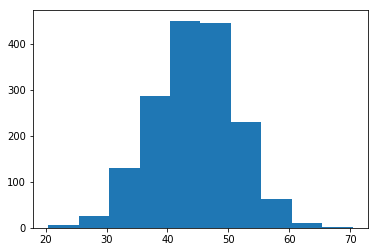

In [23]:
plt.hist(sheet.face_df.area)

(array([ 38., 431., 768., 341.,  74.]),
 array([4., 5., 6., 7., 8., 9.]),
 <a list of 5 Patch objects>)

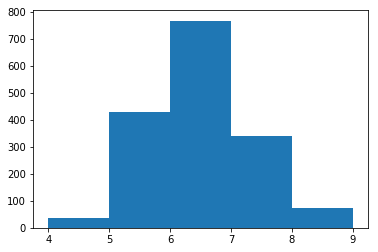

In [33]:
plt.hist(sheet.face_df.num_sides, bins=5)

In [34]:
ipv.clear()

fig, mesh = sheet_view(
    sheet,
    mode='3D',
    face={
        "visible":True,
        "color": (sheet.face_df.area<31).replace(False, 0).replace(True,1),
        'colormap':'Reds',
    },
    edge={
        "visible":True,
        'color':sheet.edge_df.is_active,
        'colormap':'binary',
    }
)
ipv.squarelim()
ipv.show()

/home/admin-suz/anaconda3/lib/python3.6/site-packages/tyssue-0.3.3-py3.6-linux-x86_64.egg/tyssue/draw/ipv_draw.py:185: UserWarning: Attempting to draw a colormap with a uniform value
  warnings.warn("Attempting to draw a colormap " "with a uniform value")


VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7],
       ...,
       [0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7]]), lines=array([[2454, 1907],
       [ 713,  529],
       [ 359, 2845],
       ...,
       [1479, 3299],
       [3299,  127],
       [ 127, 3299]], dtype=uint32), texture=None, x=array([ -5.90456765,  10.9851464 ,  -6.88594139, ...,  32.89717056,
       -51.17836369, -52.28944756]), y=array([ 55.73872063,  55.76812485,  55.60318296, ..., -39.00256657,
        -4.37578448,  -8.22543429]), z=array([-13.07074923,  -5.4449606 ,  -3.76782113, ...,  64.16409375,
        62.66845347,  54.61392773])), Mesh(color=array([[1.        , 0.96078431, 0.94117647],
       [0.40392157, 0.        , 0.05098039],
       [1.        , 0.96078431, 0.94117647],
       ...,
       [1.        , 0.96078431, 0.94117647],
       [1.        , 0.96078431, 0.94117647],
       [1.        , 0.96078431, 0.94117647]]), texture=None, triangles=array([[    0,  1652, 11552],
       [ 1632,  1653, 11553],
       [  178,  1654, 11554],
       ...,
       [ 1396, 11549, 21449],
       [  728, 11550, 21450],
       [ 1651, 11551, 21451]], dtype=uint32), x=array([ -2.06191442,  -9.08015882,  -9.76704304, ..., -52.28944756,
       -51.2167557 , -52.28944756]), y=array([55.91253753, 55.17779561, 54.25757005, ..., -8.22543429,
       -8.82558554, -8.22543429]), z=array([-12.83585192, -11.49318552, -23.25175406, ...,  54.61392773,
        59.79377336,  54.61392773]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-118.65080384256449, 120.1708988522043], ylim=[-118.65080384256449, 120.1708988522043], zlim=[-118.65080384256449, 120.1708988522043]),))

In [35]:
sheet.Nf

1652

In [36]:
from tyssue.io import hdf5
hdf5.save_datasets('superegg_v3.hf5', sheet)

In [38]:
sheet_extract = sheet.extract_bounding_box(z_boundary=(-3.5,3.5))

In [39]:
ipv.clear()
fig, mesh = sheet_view(
    sheet_extract,
    mode='3D',
    face={
        "visible":True,
        "color": sheet_extract.face_df.area
    }
)
ipv.squarelim()
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[131, 110],
       [140,  52],
       [162,  25],
       [ 62,  28],
       [ 59, 141],
       [ 66,  67],
       [141,  59],
       [128,  66],
       [ 69,  46],
       [ 77,  63],
       [ 84,  73],
       [ 73, 115],
       [ 80,  72],
       [ 72,  80],
       [ 80,  79],
       [ 79,  15],
       [ 79,  80],
       [ 51,  53],
       [163, 131],
       [ 52, 140],
       [ 25,  26],
       [ 37, 154],
       [ 53, 135],
       [152, 153],
       [170,   4],
       [154,  37],
       [ 12, 105],
       [126, 106],
       [106, 147],
       [ 99,  86],
       [136, 179],
       [ 17,  18],
       [160,  43],
       [103, 171],
       [ 29,  35],
       [151,  29],
       [169,  68],
       [ 57, 172],
       [ 27, 103],
       [100, 150],
       [  7,   8],
       [101,  31],
       [171, 103],
       [ 42, 137],
       [123, 168],
       [  8, 145],
       [144,  41],
       [ 22,  58],
       [  2, 108],
       [  3,   2],
       [132,  11],
       [  0,  10],
       [ 18,  17],
       [  1,   0],
       [ 81,   3],
       [174,  19],
       [ 94,   7],
       [108,   2],
       [  2, 125],
       [ 77, 176],
       [ 63,  77],
       [ 23, 182],
       [112,  69],
       [182,  23],
       [ 58,  22],
       [ 14, 121],
       [ 15,  79],
       [111,  78],
       [118, 119],
       [115,  73],
       [ 73,  49],
       [ 97, 124],
       [ 74,  47],
       [ 35,  87],
       [181, 138],
       [ 13, 106],
       [106, 126],
       [123,  18],
       [ 18, 123],
       [ 36, 159],
       [136,  18],
       [ 18, 136],
       [137,  95],
       [ 48,  12],
       [ 12,  48],
       [147,   6],
       [103, 155],
       [ 28, 157],
       [ 98, 164],
       [116,  16],
       [166, 167],
       [165, 107],
       [  4, 154],
       [ 20,  12],
       [ 10,  21],
       [ 11,  20],
       [ 85, 183],
       [149,  22],
       [ 22, 149],
       [148,   1],
       [ 26,  55],
       [ 38, 152],
       [ 37, 173],
       [ 85,  22],
       [ 22,  85],
       [ 56,  21],
       [ 21,  56],
       [ 86,  85],
       [ 97,  74],
       [ 74,  97],
       [ 96,  97],
       [107, 174],
       [158,  89],
       [ 89, 158],
       [108, 178],
       [178, 108],
       [111,  79],
       [ 79, 111],
       [ 59, 133],
       [133, 134],
       [138,  35],
       [ 35, 138],
       [139,  74],
       [122, 181],
       [140, 162],
       [162, 140],
       [ 67,  60],
       [ 62, 109],
       [109,  62],
       [117,  75],
       [145, 144],
       [144, 145],
       [113,  30],
       [150, 151],
       [156,  37],
       [ 54,  26],
       [ 26,  54],
       [160, 172],
       [172, 160],
       [161, 160],
       [175,  76],
       [ 76, 175],
       [176, 175],
       [138, 114],
       [  9, 127],
       [ 39,  82],
       [ 16,  84],
       [ 15,  34],
       [ 93,  39],
       [134,  61],
       [ 46, 129],
       [ 46,  64],
       [ 64,  46],
       [142,  11],
       [ 11, 142],
       [146,  48],
       [ 48,  50],
       [130,  59],
       [ 63,  69],
       [ 69,  63],
       [ 45,  64],
       [ 64,  70],
       [ 34,  71],
       [116, 166],
       [166, 116],
       [ 71,  72],
       [ 82,  98],
       [145, 117],
       [122,  88],
       [ 88, 122],
       [124, 122],
       [105,   5],
       [177,  19],
       [ 19, 177],
       [126,   9],
       [128,  45],
       [ 45, 128],
       [129, 128],
       [164,  92],
       [ 31, 171],
       [172, 102],
       [171, 161],
       [180,  17],
       [179, 180],
       [182,  14],
       [183, 182],
       [125,  36],
       [ 42,   8],
       [  8,  42],
       [ 41,  42],
       [135,  54],
       [ 52, 163],
       [ 54,  52],
       [175,  57]

In [40]:
sheet_extract.Nf

49